In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Splitting training data from validation data
# Rescale the input for Gradient Descent optimization
x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
x_test = x_test/255.0

# Reshape the output
y_valid, y_train = y_train_full[:5000].reshape(-1), y_train_full[5000:].reshape(-1)

In [4]:
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
def visualize_clothes(index):
    plt.figure(figsize=(4, 4))
    plt.imshow(x_train[index])
    plt.xlabel(class_names[y_train[index]])

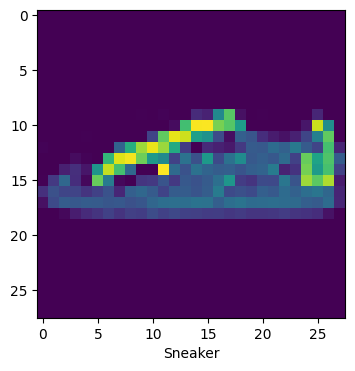

In [6]:
visualize_clothes(620)

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(600, activation = 'relu', kernel_initializer = 'he_normal'), # weight initialization
    keras.layers.BatchNormalization(), # normalize all the data coming out of the first hidden layer
    keras.layers.Dense(200, activation = 'relu', kernel_initializer = 'he_normal'),
    keras.layers.BatchNormalization(), # normalization for the second layer
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(loss='sparse_categorical_crossentropy', # used when y is a scalar value
              optimizer='sgd',
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=20, batch_size=20, validation_data=(x_valid, y_valid))

Epoch 1/20
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7799 - loss: 0.6330 - val_accuracy: 0.8664 - val_loss: 0.3841
Epoch 2/20
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8580 - loss: 0.3947 - val_accuracy: 0.8818 - val_loss: 0.3409
Epoch 3/20
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8752 - loss: 0.3466 - val_accuracy: 0.8852 - val_loss: 0.3214
Epoch 4/20
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8805 - loss: 0.3220 - val_accuracy: 0.8820 - val_loss: 0.3201
Epoch 5/20
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8890 - loss: 0.3051 - val_accuracy: 0.8832 - val_loss: 0.3243
Epoch 6/20
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8936 - loss: 0.2890 - val_accuracy: 0.8876 - val_loss: 0.3134
Epoch 7/20
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.8977 - loss: 0.2757 - val_accuracy: 0.8882 - val_loss: 0.3190
Epoch 8/20
2750/2750 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8992 - loss: 0

In [10]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8791 - loss: 0.3679


[0.3571977913379669, 0.8805000185966492]